<a href="https://colab.research.google.com/github/VishruthVS/ML_Lab/blob/main/5/Iris%20Dataset/naive_bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install colorama


Data=[6.9, 3.2, 5.7, 2.3], Predicted: Iris-virginica , Tag: Iris-virginica
Data=[6.6, 2.9, 4.6, 1.3], Predicted: Iris-versicolor , Tag: Iris-versicolor
Data=[4.8, 3.4, 1.9, 0.2], Predicted: Iris-setosa , Tag: Iris-setosa
Data=[5.9, 3.2, 4.8, 1.8], Predicted: Iris-virginica , Tag: Iris-versicolor
Data=[6.7, 3.0, 5.0, 1.7], Predicted: Iris-virginica , Tag: Iris-versicolor
Data=[4.9, 2.5, 4.5, 1.7], Predicted: Iris-versicolor , Tag: Iris-virginica
Data=[4.7, 3.2, 1.6, 0.2], Predicted: Iris-setosa , Tag: Iris-setosa
Data=[5.2, 3.5, 1.5, 0.2], Predicted: Iris-setosa , Tag: Iris-setosa
Data=[5.6, 2.9, 3.6, 1.3], Predicted: Iris-versicolor , Tag: Iris-versicolor
Data=[6.7, 3.1, 4.4, 1.4], Predicted: Iris-versicolor , Tag: Iris-versicolor
Data=[5.2, 4.1, 1.5, 0.1], Predicted: Iris-setosa , Tag: Iris-setosa
Data=[4.3, 3.0, 1.1, 0.1], Predicted: Iris-setosa , Tag: Iris-setosa
Data=[5.7, 2.8, 4.1, 1.3], Predicted: Iris-versicolor , Tag: Iris-versicolor
Data=[5.7, 3.0, 4.2, 1.2], Predicted: Iris-v

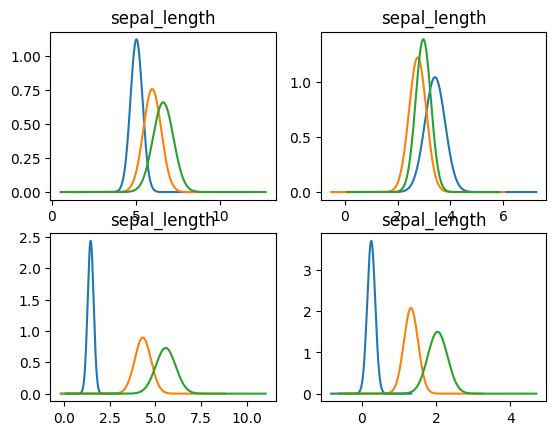

In [3]:
import random
from math import sqrt
from math import exp
from math import pi

import pandas
from colorama import Fore
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

lookup = dict()
separated = dict()
data_frame = 'None'


def load_csv(fileـname):
    dataset = list()
    global data_frame
    data_frame = pandas.read_csv(fileـname)
    for row in data_frame.values.tolist():
        if not row:
            continue
        vector = [float(x) for x in row[:4]]
        vector.append(row[4])
        dataset.append(vector)
    random.shuffle(dataset)
    return dataset


def tagg_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup


def separate_by_class(dataset):
    for i in range(len(dataset)):
        vector = dataset[i]
        tagg = vector[-1]
        if tagg not in separated:
            separated[tagg] = list()
        separated[tagg].append(vector)
    return separated


def mean(numbers):
    return sum(numbers) / float(len(numbers))


def standard_deviation(numbers):
    avg = mean(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / float(len(numbers) - 1)
    return sqrt(variance)


def train_model(dataset):
    separated = separate_by_class(dataset)
    model = dict()
    for tagg, rows in separated.items():
        s = [(mean(column), standard_deviation(column), len(column)) for column in zip(*rows)]
        del (s[-1])
        model[tagg] = s
    return model


def normal_distribution(x, mean, stdev):
    exponent = exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent


def predict(model, row):
    total_rows = sum([model[label][0][2] for label in model])
    probabilities = dict()
    for tagg, features in model.items():
        probabilities[tagg] = model[tagg][0][2] / float(total_rows)
        for i in range(len(features)):
            mean, stdev, _ = features[i]
            probabilities[tagg] *= normal_distribution(row[i], mean, stdev)
    best_label, best_prob = None, -1
    for tagg, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = tagg
    return best_label


def plot(model):
    figure, axis = plt.subplots(2, 2)
    for j in range(3):
        for i in range(4):
            sigma = model[j][i][1]
            x = np.linspace(model[j][i][0] - 10 * sigma, model[j][i][0] + 10 * sigma, 1000)
            axis[int(i / 2), i % 2].plot(x, stats.norm.pdf(x, model[j][i][0], sigma))
            axis[int(i / 2), i % 2].set_title(data_frame.columns.values[0])
    plt.show()


if __name__ == '__main__':

    filename = 'iris.csv'

    dataset = load_csv(filename)
    train_dateset = dataset[:120]

    tagg_to_int(train_dateset, len(train_dateset[0]) - 1)
    model = train_model(train_dateset)

    test_dataset = dataset[120:]
    dictionary = {v: k for k, v in lookup.items()}

    error = 0
    for row in test_dataset:
        test = [float(x) for x in row[:4]]
        label = predict(model, test)
        if dictionary[label] == row[4]:
            print(Fore.GREEN + 'Data=%s, Predicted: %s , Tag: %s' % (test, dictionary[label], row[4]))
        else:
            print(Fore.RED + 'Data=%s, Predicted: %s , Tag: %s' % (test, dictionary[label], row[4]))
            error += 1
    print(Fore.YELLOW + 'Prediction Accuracy= ', (len(test_dataset) - error) / len(test_dataset) * 100, '%')
    plot(model)